In [1]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
from tensorflow.keras import preprocessing

from keras.models import Sequential
from keras.layers import Dense, Flatten, SimpleRNN, LSTM
from keras.layers.embeddings import Embedding
from tensorflow.keras.optimizers import SGD

from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras import Input
from tensorflow.keras.optimizers import Adam

In [2]:
(x_train2, y_train2), (x_test2, y_test2) = mnist.load_data()

In [3]:
print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)


In [4]:
x_val2 = x_train2[:5000]
x_train2 =  x_train2[5000:]
y_val2 = y_train2[:5000]
y_train2 = y_train2[5000:]

print(x_val2.shape)
print(x_train2.shape)
print(y_val2.shape)
print(y_train2.shape)

(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)


In [5]:
x_train2 = x_train2.astype("float32")
x_test2 = x_test2.astype('float32')
x_val2 = x_val2.astype("float32")
x_train2, x_test2, x_val2 = x_train2/255.0, x_test2/255.0, x_val2/255.0

In [6]:
y_train2 = to_categorical(y_train2, 10)
y_val2 = to_categorical(y_val2, 10)
y_test2 = to_categorical(y_test2, 10)

In [7]:
nn_model = Sequential()
nn_model.add(SimpleRNN(180, activation="relu", input_shape=(28,28)))
nn_model.add(Dense(10, activation="sigmoid"))
nn_model.compile(optimizer="Adam",loss="categorical_crossentropy", metrics=["accuracy"])

In [8]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 180)               37620     
                                                                 
 dense (Dense)               (None, 10)                1810      
                                                                 
Total params: 39,430
Trainable params: 39,430
Non-trainable params: 0
_________________________________________________________________


In [9]:
training_hist =  nn_model.fit(x_train2, y_train2, batch_size=100, epochs=10, verbose=2, validation_data = [x_val2, y_val2])

Epoch 1/10
550/550 - 16s - loss: 0.4394 - accuracy: 0.8565 - val_loss: 0.2298 - val_accuracy: 0.9336 - 16s/epoch - 29ms/step
Epoch 2/10
550/550 - 10s - loss: 0.1748 - accuracy: 0.9470 - val_loss: 0.1368 - val_accuracy: 0.9620 - 10s/epoch - 19ms/step
Epoch 3/10
550/550 - 9s - loss: 0.1356 - accuracy: 0.9600 - val_loss: 0.1240 - val_accuracy: 0.9614 - 9s/epoch - 17ms/step
Epoch 4/10
550/550 - 9s - loss: 0.1222 - accuracy: 0.9649 - val_loss: 0.1187 - val_accuracy: 0.9664 - 9s/epoch - 16ms/step
Epoch 5/10
550/550 - 9s - loss: 0.1068 - accuracy: 0.9690 - val_loss: 0.1129 - val_accuracy: 0.9660 - 9s/epoch - 17ms/step
Epoch 6/10
550/550 - 9s - loss: 0.0954 - accuracy: 0.9717 - val_loss: 0.0971 - val_accuracy: 0.9712 - 9s/epoch - 17ms/step
Epoch 7/10
550/550 - 9s - loss: 0.0932 - accuracy: 0.9725 - val_loss: 0.1314 - val_accuracy: 0.9692 - 9s/epoch - 17ms/step
Epoch 8/10
550/550 - 9s - loss: 0.0840 - accuracy: 0.9757 - val_loss: 0.0851 - val_accuracy: 0.9752 - 9s/epoch - 17ms/step
Epoch 9/10
5

Text(0, 0.5, 'loss')

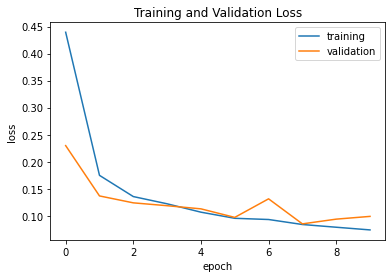

In [10]:
plt.plot(training_hist.history['loss'])
plt.plot(training_hist.history['val_loss'])
plt.title("Training and Validation Loss")
plt.legend(['training' , 'validation'],loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

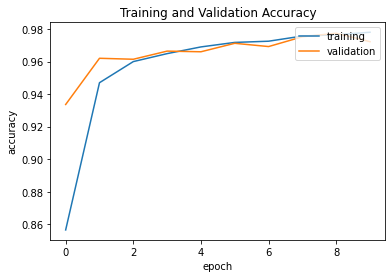

In [11]:
plt.plot(training_hist.history['accuracy'])
plt.plot(training_hist.history['val_accuracy'])
plt.title("Training and Validation Accuracy")
plt.legend(['training' , 'validation'],loc='upper right')
plt.xlabel('epoch')
plt.ylabel('accuracy')